# Project for Supervised Learning 

Dataset:   airq402.dat

Source: U.S. Department of Transportation

Description: Airfsres and passengers for U.S. Domestic Routes
for 4th Quarter of 2002.

Variables/Columns

City1   1-3
City2   5-7
Average Fare    11-17
Distance      20-23
Average weekly passengers   26-33
market leading airline    36-37
market share     40-45
Average fare    48-54
Low price airline   57-58
market share    61-66
price     69-75

1. Import and store the data in a data frame. (2.5 points)
2. Remove the outliers from the data (5 points)
3. Treat “Average Fare” – 3rdColumn as your Dependent Variable and Rest of the columns as Independent Variable. (2.5 points)
4. Drop the independent variables which has less than 0.1 correlation with the dependent variable (5 points)
5. Create scatter Plot of Independent Variable vs Dependent Variable. (2.5 points)
6. Divide the data set into training and test data set and build a Multiple Linear Regression model. (5 points)
7. Print the coefficients & intercepts of the linear regression model (5 points)
8. Print the accuracy of the overall model (2.5 points)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Import and store the data in a data frame

In [2]:
data = pd.read_table("http://www.stat.ufl.edu/~winner/data/airq402.dat", sep="\s+", header = None)

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead.
  """Entry point for launching an IPython kernel.


In [3]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


Varaibles and Columns

City1   1-3
City2   5-7
Average Fare    11-17
Distance      20-23
Average weekly passengers   26-33
market leading airline    36-37
market share     40-45
Average fare    48-54
Low price airline   57-58
market share    61-66
price     69-75

In [4]:
data.columns = ['city1','city2','Average_Fare',
                     'Distance','Average_weekly_passengers','market_leading_airline','market_share','Average_fare','Low_price_airline','market_share','price']

In [5]:
data.head()

,city1,city2,Average_Fare,Distance,Average_weekly_passengers,market_leading_airline,market_share,Average_fare,Low_price_airline,market_share,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


In [6]:
data.shape

(1000, 11)

In [7]:
data.dtypes

city1                         object
city2                         object
Average_Fare                 float64
Distance                       int64
Average_weekly_passengers    float64
market_leading_airline        object
market_share                 float64
Average_fare                 float64
Low_price_airline             object
market_share                 float64
price                        float64
dtype: object

In [8]:
data.columns

Index(['city1', 'city2', 'Average_Fare', 'Distance',
       'Average_weekly_passengers', 'market_leading_airline', 'market_share',
       'Average_fare', 'Low_price_airline', 'market_share', 'price'],
      dtype='object')

In [9]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
city1                        1000 non-null object
city2                        1000 non-null object
Average_Fare                 1000 non-null float64
Distance                     1000 non-null int64
Average_weekly_passengers    1000 non-null float64
market_leading_airline       1000 non-null object
market_share                 1000 non-null float64
Average_fare                 1000 non-null float64
Low_price_airline            1000 non-null object
market_share                 1000 non-null float64
price                        1000 non-null float64
dtypes: float64(6), int64(1), object(4)
memory usage: 86.0+ KB


In [10]:
data.describe()


,Average_Fare,Distance,Average_weekly_passengers,market_share,Average_fare,market_share,price
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000
mean,163.37542,1056.973000,672.279140,60.128590,166.64756,34.551480,143.193090
std,55.36547,643.203251,766.519254,19.367779,62.66014,27.096999,47.229184
min,50.52000,108.000000,181.410000,17.680000,50.52000,1.060000,49.610000
25%,125.97500,553.500000,257.197500,46.510000,124.08500,13.195000,113.767500
50%,161.34500,919.000000,404.780000,59.240000,161.40000,26.140000,137.825000
75%,197.39250,1452.500000,769.912500,73.510000,202.97750,52.972500,168.530000
max,401.23000,2724.000000,8950.760000,100.000000,490.03000,100.000000,387.940000


In [11]:
data.columns

Index(['city1', 'city2', 'Average_Fare', 'Distance',
       'Average_weekly_passengers', 'market_leading_airline', 'market_share',
       'Average_fare', 'Low_price_airline', 'market_share', 'price'],
      dtype='object')

# 2. Remove the outliers from the data 

C:\Users\hp\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


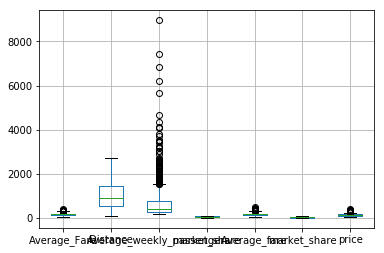

In [12]:
data.plot.box(grid='True')

In [13]:
data.head()
print('Shape of Dataset Before removing the outliers:',data.shape)

numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()

for col in numeric_cols:
    sorted_col = data.sort_values([col])
    q1, q3= np.percentile(sorted_col[col],[25,75])
    print(q1,q3)
    iqr = q3 - q1
    lower_bound = q1 -(1.5 * iqr) 
    upper_bound = q3 +(1.5 * iqr) 
    data = data.loc[(data[col] > lower_bound) & (data[col] < upper_bound)]

print('After Removal of outliers:',data.shape)

Shape of Dataset Before removing the outliers: (1000, 11)
125.975 197.39249999999998
550.0 1399.0
256.95 768.04


ValueError: The column label 'market_share' is not unique.

# 3. Treat “Average Fare” – 3rdColumn as your Dependent Variable and Rest of the columns as Independent Variable.

In [14]:

#features = ['City1','City2', 'Distance', 'AvgWeeklyPassg', 'MktLeadingAirline','Mkt share', 'Avg Fare','Low price airline', 'market share', 'price']
features = ['Distance', 'price','Average_weekly_passengers', 'market_share', 'Average_fare']

#Independent Variable 
y = data['Average_Fare']

#Dependent Variable 
x = data[features]
print(x)
print(y)

     Distance   price  Average_weekly_passengers  market_share  market_share  \
0         528  111.03                     424.56         70.19         70.19   
1         860  118.94                     276.84         75.10         17.23   
2         852  167.12                     215.76         78.89          2.77   
3         288   68.86                     606.84         96.97         96.97   
4         723  145.42                     313.04         39.79         15.34   
5        1204  127.69                     199.02         40.68         17.09   
6        2237  148.59                     237.17         59.94         59.94   
7        2467  174.00                     191.95         17.89         16.59   
8        1073  127.69                     550.54         76.84         76.84   
9        1130  124.78                     202.93         35.40         26.40   
10       1269  200.93                     198.80         68.39         11.91   
11       1670  161.39                   

In [15]:
data.isnull().sum()

city1                        0
city2                        0
Average_Fare                 0
Distance                     0
Average_weekly_passengers    0
market_leading_airline       0
market_share                 0
Average_fare                 0
Low_price_airline            0
market_share                 0
price                        0
dtype: int64

In [16]:
import seaborn as sns

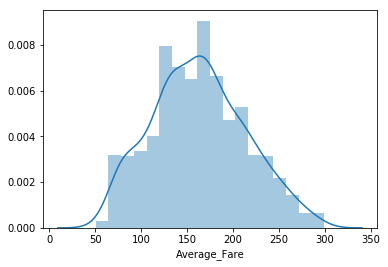

In [17]:
sns.distplot(data['Average_Fare'])

In [18]:
data.corr()

,Average_Fare,Distance,Average_weekly_passengers,market_share,Average_fare,market_share,price
Average_Fare,1.000000,0.530858,-0.190620,-0.215096,0.980411,-0.456909,0.859247
Distance,0.530858,1.000000,-0.124752,-0.544991,0.504017,-0.355803,0.538808
Average_weekly_passengers,-0.190620,-0.124752,1.000000,0.021741,-0.159413,0.078190,-0.192744
market_share,-0.215096,-0.544991,0.021741,1.000000,-0.203422,0.280583,-0.304640
Average_fare,0.980411,0.504017,-0.159413,-0.203422,1.000000,-0.483246,0.816671
market_share,-0.456909,-0.355803,0.078190,0.280583,-0.483246,1.000000,-0.223827
price,0.859247,0.538808,-0.192744,-0.304640,0.816671,-0.223827,1.000000


In [19]:
data.columns

Index(['city1', 'city2', 'Average_Fare', 'Distance',
       'Average_weekly_passengers', 'market_leading_airline', 'market_share',
       'Average_fare', 'Low_price_airline', 'market_share', 'price'],
      dtype='object')

In [20]:
data.head()

,city1,city2,Average_Fare,Distance,Average_weekly_passengers,market_leading_airline,market_share,Average_fare,Low_price_airline,market_share,price
0,CAK,ATL,114.47,528,424.56,FL,70.19,111.03,FL,70.19,111.03
1,CAK,MCO,122.47,860,276.84,FL,75.10,123.09,DL,17.23,118.94
2,ALB,ATL,214.42,852,215.76,DL,78.89,223.98,CO,2.77,167.12
3,ALB,BWI,69.40,288,606.84,WN,96.97,68.86,WN,96.97,68.86
4,ALB,ORD,158.13,723,313.04,UA,39.79,161.36,WN,15.34,145.42


# 4. Drop the independent variables which has less than 0.1 correlation with the dependent variable (5 points)

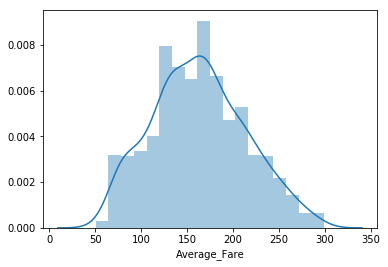

In [21]:
sns.distplot(data['Average_Fare'])

In [22]:
data.corr()

,Average_Fare,Distance,Average_weekly_passengers,market_share,Average_fare,market_share,price
Average_Fare,1.000000,0.530858,-0.190620,-0.215096,0.980411,-0.456909,0.859247
Distance,0.530858,1.000000,-0.124752,-0.544991,0.504017,-0.355803,0.538808
Average_weekly_passengers,-0.190620,-0.124752,1.000000,0.021741,-0.159413,0.078190,-0.192744
market_share,-0.215096,-0.544991,0.021741,1.000000,-0.203422,0.280583,-0.304640
Average_fare,0.980411,0.504017,-0.159413,-0.203422,1.000000,-0.483246,0.816671
market_share,-0.456909,-0.355803,0.078190,0.280583,-0.483246,1.000000,-0.223827
price,0.859247,0.538808,-0.192744,-0.304640,0.816671,-0.223827,1.000000


In [23]:
corr_matrix=data.corr()
corr_matrix["Average_fare"].sort_values(ascending=False)

Average_fare                 1.000000
Average_Fare                 0.980411
price                        0.816671
Distance                     0.504017
Average_weekly_passengers   -0.159413
market_share                -0.203422
market_share                -0.483246
Name: Average_fare, dtype: float64

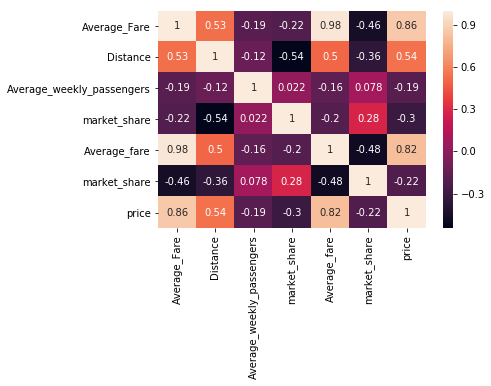

In [24]:
sns.heatmap(corr_matrix, annot=True)

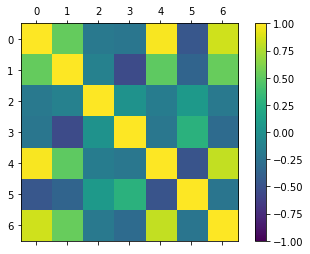

In [25]:
correlations = data.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
plt.show()

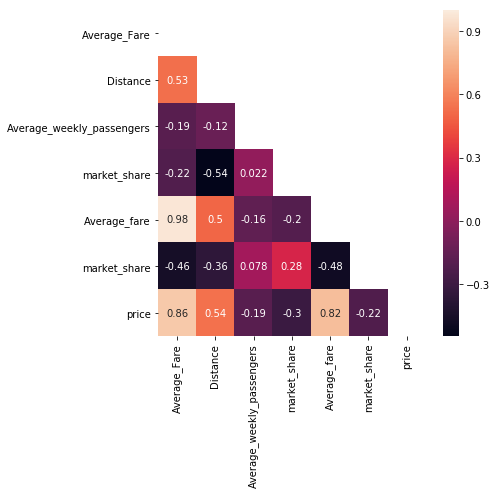

In [26]:
fig, ax = plt.subplots(figsize=(6, 6)) 
mask = np.zeros_like(data.corr())
mask[np.triu_indices_from(mask)] = 1
sns.heatmap(data.corr(), mask= mask, ax= ax, annot= True)

# Now Drop the Average_weekly_passengers and market_share colmns because the  correlation with the dependent variable is less than 0.1

In [27]:
data1=data.drop(['Average_weekly_passengers', 'market_share'], axis=1)
data1.head()

,city1,city2,Average_Fare,Distance,market_leading_airline,Average_fare,Low_price_airline,price
0,CAK,ATL,114.47,528,FL,111.03,FL,111.03
1,CAK,MCO,122.47,860,FL,123.09,DL,118.94
2,ALB,ATL,214.42,852,DL,223.98,CO,167.12
3,ALB,BWI,69.40,288,WN,68.86,WN,68.86
4,ALB,ORD,158.13,723,UA,161.36,WN,145.42


# 5. Create scatter Plot of Independent Variable vs Dependent Variable. (2.5 points)

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


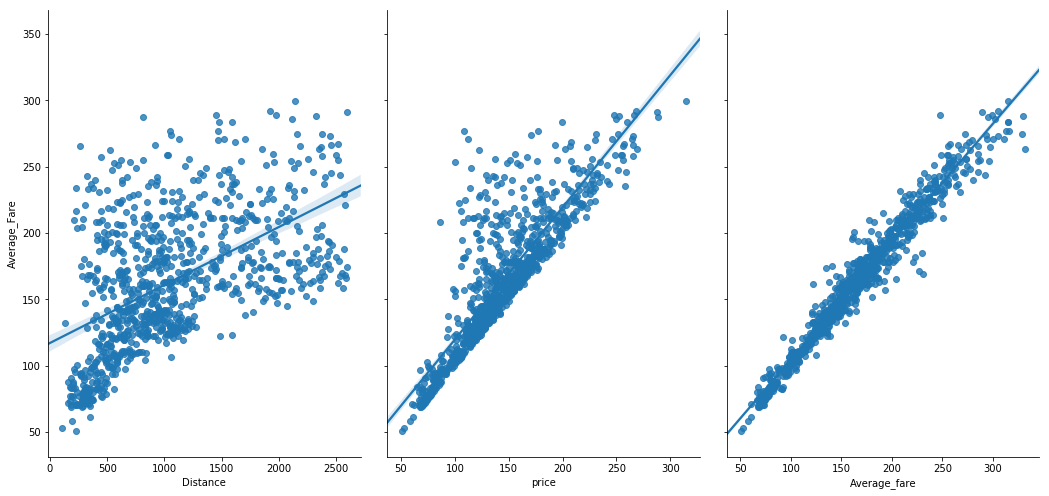

In [28]:
sns.pairplot(data1,x_vars=['Distance', 'price', 'Average_fare'],y_vars=['Average_Fare'],kind='reg',size=7,aspect=0.7)


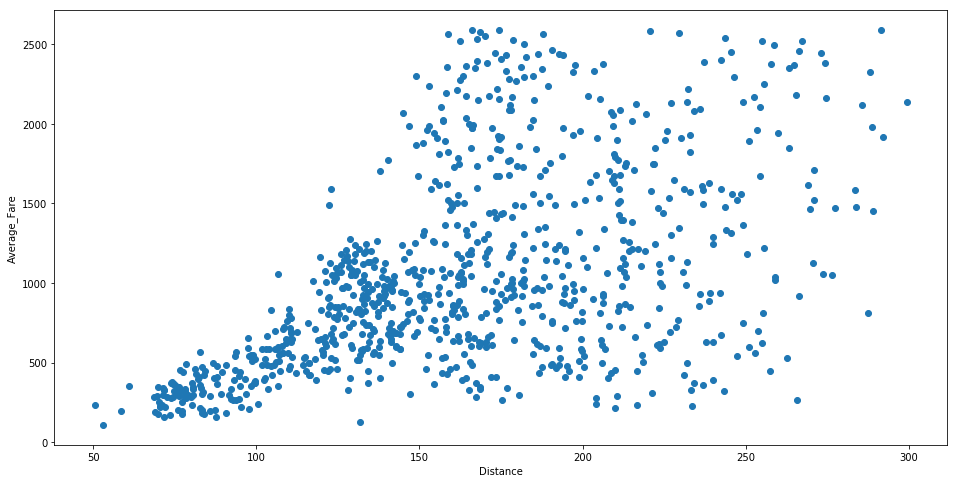

In [29]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(data1['Average_Fare'], data1['Distance'])
ax.set_xlabel('Distance')
ax.set_ylabel('Average_Fare')
plt.show()

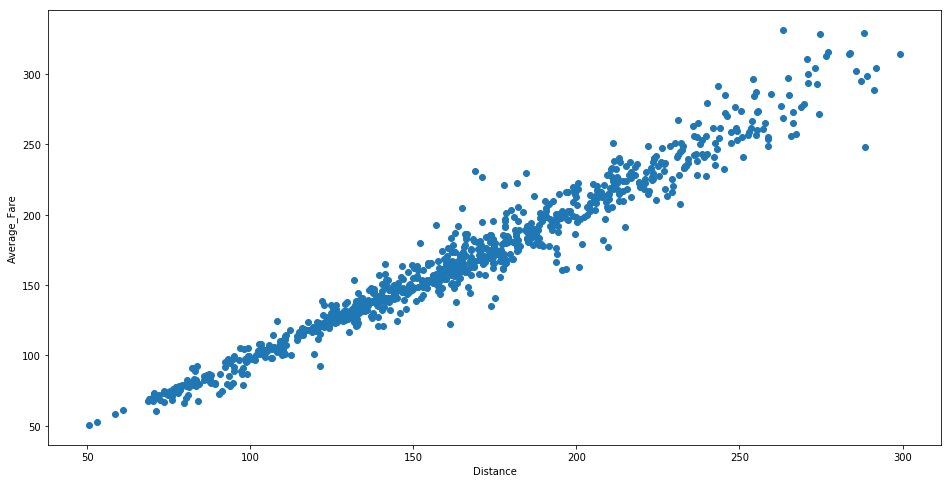

In [30]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(data1['Average_Fare'], data1['Average_fare'])
ax.set_xlabel('Distance')
ax.set_ylabel('Average_Fare')
plt.show()

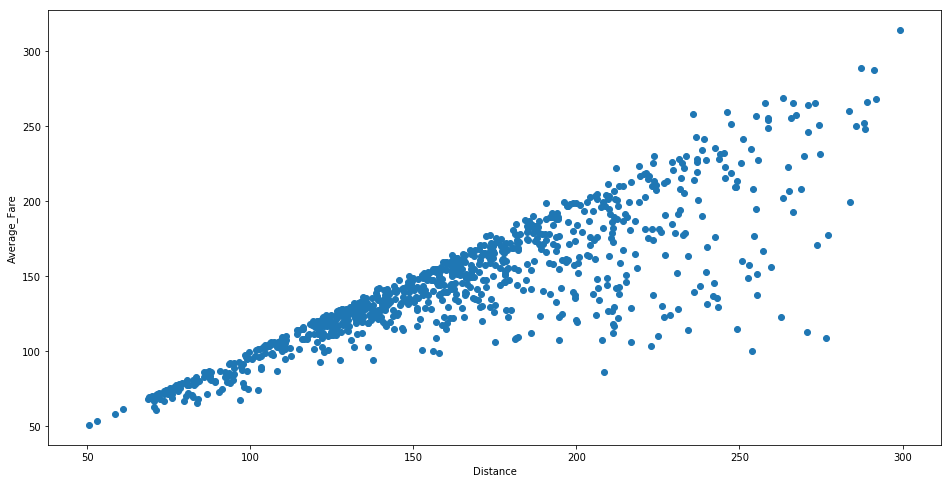

In [31]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(data1['Average_Fare'], data1['price'])
ax.set_xlabel('Distance')
ax.set_ylabel('Average_Fare')
plt.show()

# 6. Divide the data set into training and test data set and build a Multiple Linear Regression model

In [32]:
data1.head()

,city1,city2,Average_Fare,Distance,market_leading_airline,Average_fare,Low_price_airline,price
0,CAK,ATL,114.47,528,FL,111.03,FL,111.03
1,CAK,MCO,122.47,860,FL,123.09,DL,118.94
2,ALB,ATL,214.42,852,DL,223.98,CO,167.12
3,ALB,BWI,69.40,288,WN,68.86,WN,68.86
4,ALB,ORD,158.13,723,UA,161.36,WN,145.42


In [33]:
data2=data1.drop(['city1','city2','market_leading_airline','Low_price_airline'], axis=1)
data2.head()

,Average_Fare,Distance,Average_fare,price
0,114.47,528,111.03,111.03
1,122.47,860,123.09,118.94
2,214.42,852,223.98,167.12
3,69.40,288,68.86,68.86
4,158.13,723,161.36,145.42


In [34]:
data2.describe()

,Average_Fare,Distance,Average_fare,price
count,904.000000,904.000000,904.000000,904.000000
mean,162.847478,1047.587389,165.445852,143.358108
std,50.838532,617.462255,56.048630,43.812321
min,50.520000,108.000000,50.520000,50.520000
25%,127.357500,569.750000,126.165000,116.080000
50%,161.820000,920.000000,161.675000,139.135000
75%,197.392500,1437.000000,202.805000,168.572500
max,299.310000,2592.000000,331.560000,314.310000


In [35]:
data3=data2.values # convert the data frame to a numpy array
print(type(data3))
print(data3)

<class 'numpy.ndarray'>
[[114.47 528.   111.03 111.03]
 [122.47 860.   123.09 118.94]
 [214.42 852.   223.98 167.12]
 ...
 [159.97 814.   159.65 159.02]
 [ 73.57 174.    73.44  73.44]
 [126.67 859.   129.92 121.94]]


In [36]:
print(data3.shape)
data3=data3[:,1:]
print(data3.shape)

(904, 4)
(904, 3)


In [37]:
#remove the features and target
X_data=data3[:,1:]# from first column to all , with all rows 
Y_data=data3[:,0:1]# First column, with all rows

In [38]:
print(X_data.shape)
print(X_data)

(904, 2)
[[111.03 111.03]
 [123.09 118.94]
 [223.98 167.12]
 ...
 [159.65 159.02]
 [ 73.44  73.44]
 [129.92 121.94]]


In [39]:
print(Y_data.shape)
print(Y_data)

(904, 1)
[[ 528.]
 [ 860.]
 [ 852.]
 [ 288.]
 [ 723.]
 [1204.]
 [2237.]
 [2467.]
 [1073.]
 [1130.]
 [1269.]
 [1670.]
 [1121.]
 [ 580.]
 [ 349.]
 [ 767.]
 [ 487.]
 [ 677.]
 [ 981.]
 [1825.]
 [ 889.]
 [1552.]
 [ 328.]
 [1111.]
 [ 628.]
 [1180.]
 [ 321.]
 [1650.]
 [ 324.]
 [ 545.]
 [ 812.]
 [ 576.]
 [ 712.]
 [ 227.]
 [ 373.]
 [ 554.]
 [ 446.]
 [ 432.]
 [1199.]
 [ 594.]
 [ 644.]
 [ 581.]
 [ 515.]
 [ 306.]
 [ 352.]
 [ 859.]
 [ 696.]
 [ 432.]
 [ 270.]
 [ 692.]
 [1747.]
 [1946.]
 [ 321.]
 [ 332.]
 [ 595.]
 [ 669.]
 [ 906.]
 [ 214.]
 [ 425.]
 [ 508.]
 [ 516.]
 [2130.]
 [ 761.]
 [ 821.]
 [1900.]
 [ 403.]
 [ 272.]
 [1587.]
 [ 526.]
 [2172.]
 [ 903.]
 [ 356.]
 [ 481.]
 [ 749.]
 [2092.]
 [ 483.]
 [1589.]
 [ 874.]
 [1891.]
 [2139.]
 [2116.]
 [1919.]
 [ 215.]
 [2182.]
 [ 223.]
 [ 406.]
 [ 545.]
 [ 781.]
 [ 977.]
 [ 982.]
 [ 852.]
 [ 914.]
 [1340.]
 [ 972.]
 [ 183.]
 [ 768.]
 [ 525.]
 [ 160.]
 [1085.]
 [1238.]
 [ 335.]
 [1035.]
 [ 753.]
 [ 446.]
 [1519.]
 [ 995.]
 [ 868.]
 [1161.]
 [ 717.]
 [1161.]
 

In [40]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.20)

In [41]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(723, 2)
(723, 1)
(181, 2)
(181, 1)


# 7. Print the coefficients & intercepts of the linear regression model (5 points)

In [42]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()

In [43]:
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [44]:
print("the coefficients of the multilinear regression model:=",regressor.coef_)

the coefficients of the multilinear regression model:= [[1.97124016 5.4123194 ]]


In [45]:
print("the intercept of the multilinear regression model:=",regressor.intercept_) 

the intercept of the multilinear regression model:= [-69.45600979]


In [46]:
p=regressor.intercept_
q=regressor.coef_

In [47]:
# the model of the multilinear regression model
y=p*X_train+q
print("the model of the multilinear regression model:=",y)

the model of the multilinear regression model:= [[-11831.94370803 -11828.50262878]
 [-14540.03352978 -12503.61504395]
 [-10952.63062407 -10949.18954483]
 ...
 [-14583.79081594 -10976.97194874]
 [ -5721.89852671  -5366.31547783]
 [-15315.85715914 -15312.4160799 ]]


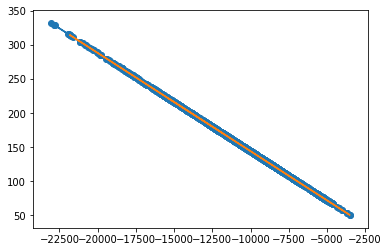

In [48]:
import matplotlib.pyplot as plt
plt.plot(y,X_train,)
plt.scatter(y,X_train)

In [49]:
y_pred = regressor.predict(X_test)

from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

mse = mean_squared_error(y_test, y_pred)

rmse = sqrt(mse)

In [50]:
print(rmse)

532.6709664389945


# 8. Print the accuracy of the overall model 

In [51]:
regressor.score(X_train,y_train)

0.30952270645735036

In [52]:

regressor.score(X_test,y_test)

0.26483719421509944